In [1]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install keras
import keras

     |████████████████████████████████| 378kB 10.5MB/s eta 0:00:01
     |████████████████████████████████| 276kB 13.2MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=d72c2154cb86b220575c0c211808996349706125527b13ddc6b999ced6c6dace
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [3]:
!unzip -o -q celeba-dataset_s.zip

In [4]:
# Importing the Keras libraries and packages
!pip install pandas
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

     |████████████████████████████████| 10.0MB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 512kB 46.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Read document
dt=pd.read_csv('celeba-dataset_s/list_attr_celeba.csv').replace(to_replace=-1, value=0, inplace=True)
# Read Images from Folders      
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen = ImageDataGenerator( ##data augmentation 
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

training_set = train_datagen.flow_from_directory('celeba-dataset_s/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                )

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('celeba-dataset_s/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            )   
from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

Found 162770 images belonging to 2 classes.
Found 19868 images belonging to 2 classes.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
#! Here We Create the CNN
# Initialising the CNN
from keras.layers import Dropout
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

# Drop out
#classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [7]:
#Fitting the CNN to the images
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 162770,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 19867)

# save model to single file
classifier.save("CNN_MoF.hdf5") # Hierarchical Data Format Fifth Version
print("Saved model to disk")

# save training history to another file
import pickle 
filehandler = open('history.pkl', 'wb') 
pickle.dump(history, filehandler)

Epoch 1/3
162770/162770 [==============================] - 10800s 66ms/step - loss: 0.1480 - accuracy: 0.9396 - val_loss: 0.1253 - val_accuracy: 0.9692
Epoch 2/3
162770/162770 [==============================] - 10777s 66ms/step - loss: 0.1146 - accuracy: 0.9553 - val_loss: 0.0422 - val_accuracy: 0.9711
Epoch 3/3
162770/162770 [==============================] - 10775s 66ms/step - loss: 0.1103 - accuracy: 0.9575 - val_loss: 0.1902 - val_accuracy: 0.9736
Saved model to disk


In [8]:
from keras.models import load_model
classifier=load_model('CNN_MoF.hdf5')


In [9]:
test_set.reset()
y_pred = classifier.predict_generator(test_set)
y_test = test_set.classes[test_set.index_array]
y_pred = ((y_pred>0.5)*1.0).flatten()  # Set the threshold to be 0.5


# Confusion Matrix
!pip install sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


     |████████████████████████████████| 7.1MB 9.9MB/s eta 0:00:01
     |████████████████████████████████| 296kB 51.8MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=a95c0679c6a0ea404ac07e74a0277a72b106554fab7bcb3b916da48564a2e503
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
from sklearn.metrics import f1_score
print(cm)
print("Prediction Accuracy is",((cm[0,0]+cm[1,1])/sum (sum(cm)))) 
print("Recall-rate is: ",(cm[1,1]/(cm[1,1]+cm[1,0])))
print("F1 Score is: ",(f1_score(y_test, y_pred)))

[[11114   296]
 [  228  8230]]
Prediction Accuracy is 0.9736259311455607
Recall-rate is:  0.9730432726412863
F1 Score is:  0.9691474328780028


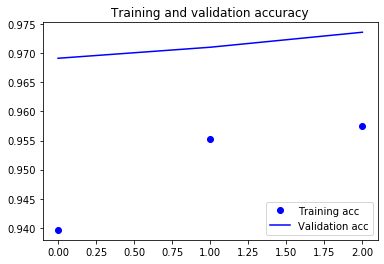

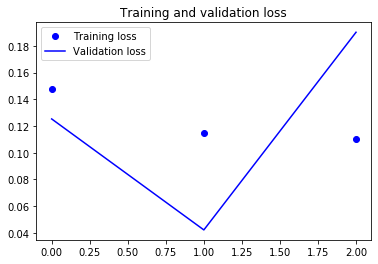

In [11]:
import pickle
with open('history.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()